In [26]:
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

with open("balancedFIR32_20_res.json") as f:
    balancedRes = json.load(f)

with open("regularFIR32_res.json") as f:
    regularRes = json.load(f)

balancedSteps = np.array(balancedRes["steps"])
balancedComms = np.array(balancedRes["communications"])

regularSteps = np.array(regularRes["steps"])
regularComms = np.array(regularRes["communications"])

In [27]:
offset_y = balancedComms - regularComms
offset_x = balancedSteps - regularSteps

ang = np.arctan2(offset_x, offset_y) * (180/np.pi)

steps = np.linspace(-172.5, 172.5, 24)
count = []
# count.append(np.sum(ang < steps[0]))
for lower, upper in zip(steps[:-1], steps[1:]):
  count.append(np.sum((ang >=lower) * (ang < upper)))

count.append(np.sum(ang >= steps[-1]) + np.sum(ang < steps[0]))

angle = steps+7.5

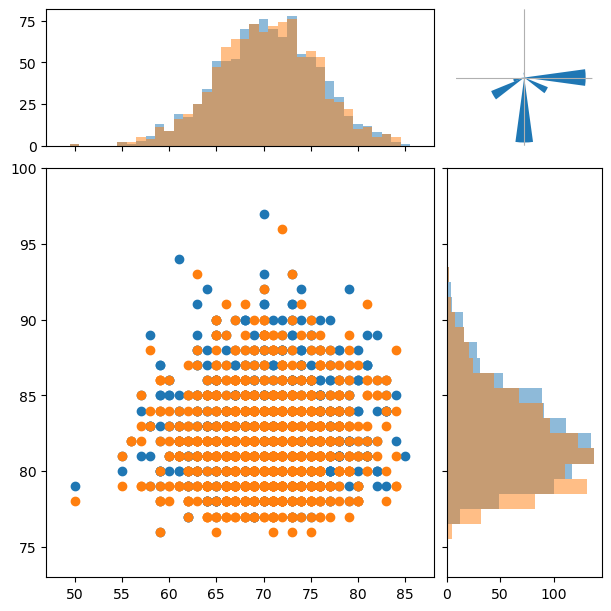

In [28]:
fig, axs = plt.subplot_mosaic(
    [['histComm', 'transDir'],
    ['dsSample', 'histSteps']],
    figsize=(6, 6),
    width_ratios=(3, 1.2), height_ratios=(1, 3),
    layout='constrained',
    per_subplot_kw = {"transDir":{"polar":True}})

dsSampleXLower = int(np.min(np.concatenate([regularComms, balancedComms])))
dsSampleXHigher = int(np.max(np.concatenate([regularComms, balancedComms])))

dsSampleYLower = int(np.min(np.concatenate([regularSteps, balancedSteps])))
dsSampleYHigher = int(np.max(np.concatenate([regularSteps, balancedSteps])))

axs["dsSample"].set_xlim((dsSampleXLower-3, dsSampleXHigher+3))
axs["dsSample"].set_ylim((dsSampleYLower-3, dsSampleYHigher+3))
axs["dsSample"].scatter(regularComms, regularSteps, alpha=1)
axs["dsSample"].scatter(balancedComms,balancedSteps, alpha=1)

binsx = np.arange(dsSampleXLower-3, dsSampleXHigher+3) - 0.5
axs["histComm"].tick_params(axis="x", labelbottom=False)
axs["histComm"].set_xlim((dsSampleXLower-3, dsSampleXHigher+3))
_ = axs["histComm"].hist(regularComms, binsx, alpha=0.5)
_ = axs["histComm"].hist(balancedComms, binsx, alpha=0.5)

binsy = np.arange(dsSampleYLower-3, dsSampleYHigher+3) - 0.5
axs["histSteps"].tick_params(axis="y", labelleft=False)
axs["histSteps"].set_ylim((dsSampleYLower-3, dsSampleYHigher+3))
_ = axs["histSteps"].hist(regularSteps, binsy, alpha=0.5, orientation='horizontal')
_ = axs["histSteps"].hist(balancedSteps, binsy, alpha=0.5, orientation='horizontal')

axs["transDir"].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

axs["transDir"].tick_params(
    axis='y',          # changes apply to the y-axis
    rotation=-75
    ) # labels along the bottom edge are off

axs["transDir"].set_xticks([0, np.pi/2, np.pi, 3*np.pi/2], ["comm+", "steps+", "comm-", "steps-"])
axs["transDir"].set_yticks([500, 1000, 1500, 2000])#, ["500", "1000", "1500", "Number of\nDesigns\n2000"])
#for label in ax.get_yticklabels(minor=True):
#    label.set_verticalalignment('center')

axs["transDir"].spines['polar'].set_visible(False)

#ax.set_ylabel("Number of\nDesigns", labelpad=25, rotation=-75)
#ax.yaxis.set_label_position('right')

_ = axs["transDir"].bar((angle*(np.pi/180)), count, width=np.pi/12+0.01)

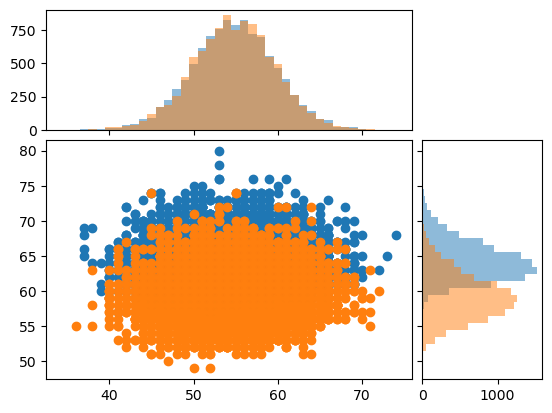

In [6]:
fig, ax = plt.subplots()

ax.scatter(regularComms, regularSteps, alpha=1)
ax.scatter(balancedComms, balancedSteps, alpha=1)

divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

_ = ax_histx.hist(regularComms, np.linspace(34.5, 72.5, 39), alpha=0.5)
_ = ax_histx.hist(balancedComms, np.linspace(34.5, 72.5, 39), alpha=0.5)

_ = ax_histy.hist(regularSteps, np.linspace(49.5, 75.5, 27), alpha=0.5, orientation='horizontal')
_ = ax_histy.hist(balancedSteps, np.linspace(49.5, 75.5, 27), alpha=0.5, orientation='horizontal')

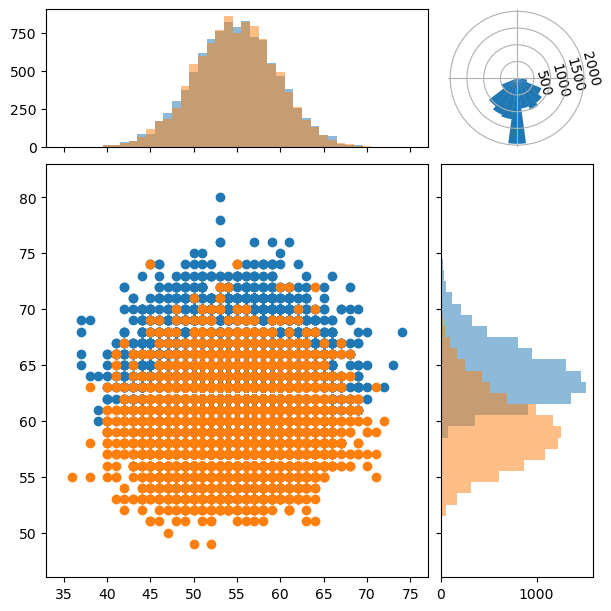